<a href="https://colab.research.google.com/github/WilliamZhang20/General-Object-Detection/blob/master/Pre-Trained-Model-Pascal-VOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install torch torchvision opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
"""
Load the Pascal VOC dataset!
"""
import torch
import torchvision
from torchvision.datasets import VOCDetection
import torchvision.transforms as T
from torch.utils.data import DataLoader

# Define the transformations: Convert to tensor and normalize
transform = T.Compose([T.ToTensor()])

# Load PASCAL VOC dataset
train_dataset = VOCDetection(root='path_to_data', year='2012', image_set='train', download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Example of the first image and its annotation
image, target = train_dataset[0]
print(image.shape)  # Image tensor shape
print(target)       # Annotation dictionary

100%|██████████| 2.00G/2.00G [01:47<00:00, 18.6MB/s]


Extracting path_to_data/VOCtrainval_11-May-2012.tar to path_to_data
torch.Size([3, 442, 500])
{'annotation': {'folder': 'VOC2012', 'filename': '2008_000008.jpg', 'source': {'database': 'The VOC2008 Database', 'annotation': 'PASCAL VOC2008', 'image': 'flickr'}, 'size': {'width': '500', 'height': '442', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'horse', 'pose': 'Left', 'truncated': '0', 'occluded': '1', 'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'}, 'difficult': '0'}, {'name': 'person', 'pose': 'Unspecified', 'truncated': '1', 'occluded': '0', 'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'}, 'difficult': '0'}]}}


In [14]:
import torchvision.models.detection as detection

# Load a pre-trained YOLOv5 model (for demonstration, using Faster R-CNN as a placeholder for YOLO)
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Define a function to perform object detection
def detect_objects(image):
    with torch.no_grad():
        prediction = model([image])
    return prediction

# Use one image from the dataset and apply object detection
image, _ = train_dataset[4]
predictions = detect_objects(image)

# Print predictions
print(predictions)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[{'boxes': tensor([[ 45.6681, 202.0575,  94.7317, 237.3570],
        [490.9908, 271.3371, 499.7050, 320.1019],
        [155.7857, 199.9133, 229.6801, 239.4698],
        [238.2027, 196.6776, 243.6574, 213.6271],
        [  3.5841, 138.9430,  16.9290, 174.0777],
        [248.5243, 194.7651, 254.3962, 215.7948],
        [496.3396, 269.0856, 500.0000, 322.0081],
        [233.5956, 198.1974, 238.6528, 215.3049],
        [156.4009, 198.5271, 228.1178, 239.9046],
        [232.7588, 198.1835, 237.6084, 207.9362],
        [ 48.2679, 201.5524,  93.4546, 236.3359],
        [ 12.7302,  46.8199,  51.2599,  89.3887],
        [209.4115, 203.1492, 212.9739, 208.6259],
        [208.2391, 203.9039, 214.3609, 209.9393],
        [236.7672, 197.3183, 241.2277, 214.0351],
        [225.4654, 197.6512, 229.7701, 207.0799],
        [ 28.9097, 210.9555,  32.5951, 221.4706],
        [225.9936, 204.3385, 231.4095, 222.0231]]), 'labels': tensor([ 3,  3,  8,  1, 10,  1,  3,  1,  3,  1,  8, 38,  1,  1,  1,  1,  1,  

Image shape: (375, 500, 3)


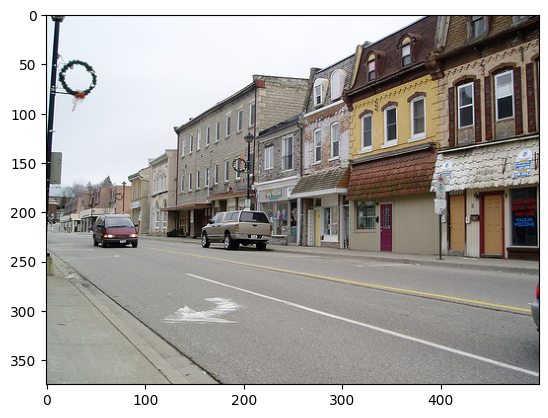

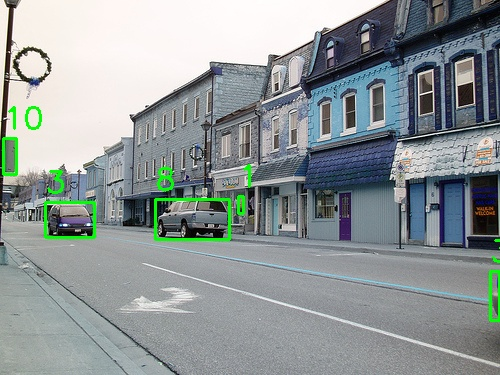

In [15]:
import cv2
from IPython.display import Image, display
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'image' is a PyTorch tensor (C x H x W), convert it to NumPy array (H x W x C)
image_np = image.permute(1, 2, 0).cpu().numpy()  # Convert tensor to NumPy array (H, W, C)

# Check if the image has 3 channels (color image)
print(f"Image shape: {image_np.shape}")

# If the image is in float32 (range [0, 1]), scale it to uint8 (range [0, 255])
if image_np.dtype != np.uint8:
    image_np = np.uint8(image_np * 255)

# If the image is grayscale (only 2D), convert to 3D by duplicating channels (to make it color)
if len(image_np.shape) == 2:
    image_np = cv2.cvtColor(image_np, cv2.COLOR_GRAY2BGR)

# Make the array contiguous
image_np = np.ascontiguousarray(image_np)

plt.imshow(image_np)
plt.show()

# Now process the bounding boxes and labels
boxes = predictions[0]['boxes'].cpu().numpy().astype(np.int32)  # Convert to NumPy array
labels = predictions[0]['labels'].cpu().numpy()

# Draw bounding boxes on the image
for i in range(len(boxes)):
    if predictions[0]['scores'][i].item() > 0.5:  # Only draw if score > 0.5
        x1, y1, x2, y2 = boxes[i]
        label = labels[i]
        cv2.rectangle(image_np, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green color for bounding box
        cv2.putText(image_np, str(label), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Save the image to a file
cv2.imwrite("detected_image.jpg", image_np)

# Display the image using IPython.display.Image
display(Image("detected_image.jpg"))

Elapsed time: 0.0047 seconds


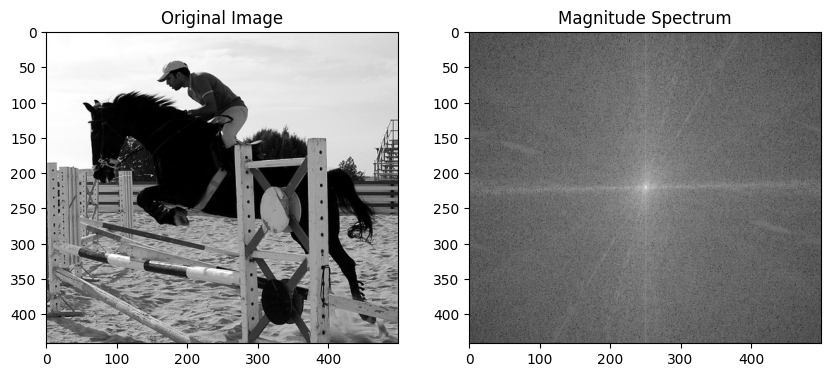

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

"""
Playing around with OpenCV features to Fourier Transform an Image
"""

import time

# Load image using train_dataset
image, _ = train_dataset[0]

# Convert to NumPy array (H x W x C) for OpenCV usage
image_np = image.permute(1, 2, 0).cpu().numpy()

# If the image is in float32 range [0, 1], scale to uint8 range [0, 255]
if image_np.max() <= 1.0:
    image_np = np.uint8(image_np * 255)

# Convert the image to grayscale (since Fourier transform works on single-channel images)
gray_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)

# Convert the image to float32 as required by DFT
gray_float32 = np.float32(gray_image)

start_time = time.time()

# Perform Fourier Transform using OpenCV
dft = cv2.dft(gray_float32, flags=cv2.DFT_COMPLEX_OUTPUT) #use the correctly converted array

# Shift zero-frequency components to the center
dft_shift = np.fft.fftshift(dft)

# Calculate magnitude spectrum (log scale)
magnitude_spectrum = cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])
magnitude_spectrum = np.log(magnitude_spectrum + 1)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

# Plot original image and its magnitude spectrum
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray') #display the grayscale image.
plt.title('Original Image')

# Magnitude Spectrum
plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')

plt.show()

Elapsed time: 0.0018 seconds


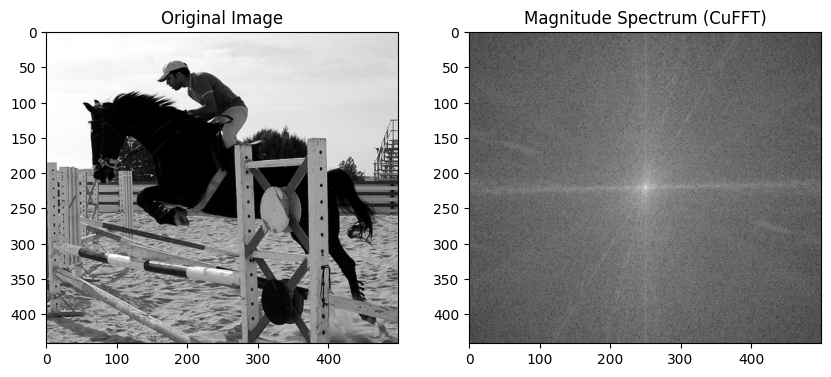

In [24]:
"""
Compare it now with CuFFT below (which was installed at the beginning)
"""
import cupy as cp
import cv2
import numpy as np
import matplotlib.pyplot as plt

import time

# Load image using train_dataset
image, _ = train_dataset[0]

# Convert to NumPy array (H x W x C) for OpenCV usage
image_np = image.permute(1, 2, 0).cpu().numpy()

# If the image is in float32 range [0, 1], scale to uint8 range [0, 255]
if image_np.max() <= 1.0:
    image_np = np.uint8(image_np * 255)

# Convert the image to grayscale (since Fourier transform works on single-channel images)
gray_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)

# Convert the image to float32 as required by DFT
gray_float32 = np.float32(gray_image)

# Transfer the image to the GPU
gray_gpu = cp.asarray(gray_float32)

start_time = time.time()

# Perform CuFFT (Fourier Transform)
dft_gpu = cp.fft.fft2(gray_gpu)

# Shift zero-frequency components to the center
dft_shift_gpu = cp.fft.fftshift(dft_gpu)

# Calculate magnitude spectrum (log scale)
magnitude_spectrum_gpu = cp.abs(dft_shift_gpu)
magnitude_spectrum_gpu = cp.log(magnitude_spectrum_gpu + 1)

# Transfer the magnitude spectrum back to the CPU
magnitude_spectrum = cp.asnumpy(magnitude_spectrum_gpu)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

"""
One can observe that CuFFT beats OpenCV
"""

# Plot original image and its magnitude spectrum
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

# Magnitude Spectrum
plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (CuFFT)')

plt.show()